In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.5)
%matplotlib inline

In order to test a number of GradeIT features including the "bridge builder", a trip segment from San Franciso Bay Area was identified. The GPS data from the trip shows the vehicle traversing the San Mateo - Hayward Bridge (very long) and the Alfred Zampa Memorial Bridge just south of Vallejo, CA (medium). The data also includes grade data collected by vehicles instrumented with inclinometers and differential GPS - this is the closest to "ground truth" grade data available for this work. A QGIS screenshot of part of the trip segment is shown below:

![San Mateo-Hayward Bridge](../docs/imgs/caltrans_SF_bridge_trip_2.png)
<!-- <img src="../docs/imgs/caltrans_SF_bridge_trip_2.png" style="width: 500px;"/> -->

In [2]:
df = pd.read_csv('data/SF_bridge_trip_segment.csv')

|Column|Description|
|------|-----------|
|sampno| household identifier |
|vehno|vehicle identifier|
|time_local|date/timestamp in the local timezone|
|time_rel|relative within vehcile or trip|
|gpsspeed|GPS logger recorded vehicle speed (miles/hour)|
|elev_ft|USGS derived elevation from a GradeIT predecessor (feet)|
|grade|Road grade derived from USGS elevation (%/100)|
|net_id|link ID in the TomTom Multinet road network|
|geom|PostGIS hex-format point geometry|
|grdsrc1|boolean indicator whether the instrumented truck grade data came from the highest quality source|
|tt_grade|road grade data from instrumented trucks 10(%) - divide this value by 1000 to compare to USGS value which is (change in elevation/change in distance)|

In [3]:
df.head()

,longitude,latitude,sampno,vehno,time_local,time_rel,gpsspeed,elev_ft,grade,net_id,geom,grdsrc1,tt_grade
0,-122.330593,37.58581,7204239,1,2013-01-17 08:06:39,89369,24.972842,11.224514,0.0003,68400006603387,0101000020E610000056D28A6F28955EC0BBD573D2FBCA...,t,2.184681
1,-122.330593,37.58581,7204239,1,2013-01-17 08:06:39,89369,24.972842,11.224514,0.0003,68400006603387,0101000020E610000056D28A6F28955EC0BBD573D2FBCA...,t,2.184681
2,-122.330593,37.58581,7204239,1,2013-01-17 08:06:39,89369,24.972842,11.224514,0.0003,68400006603387,0101000020E610000056D28A6F28955EC0BBD573D2FBCA...,t,2.184681
3,-122.330593,37.58581,7204239,1,2013-01-17 08:06:39,89369,24.972842,11.224514,0.0003,68400006603387,0101000020E610000056D28A6F28955EC0BBD573D2FBCA...,t,2.184681
4,-122.330593,37.58581,7204239,1,2013-01-17 08:06:39,89369,24.972842,11.224514,0.0003,68400006603387,0101000020E610000056D28A6F28955EC0BBD573D2FBCA...,t,2.184681


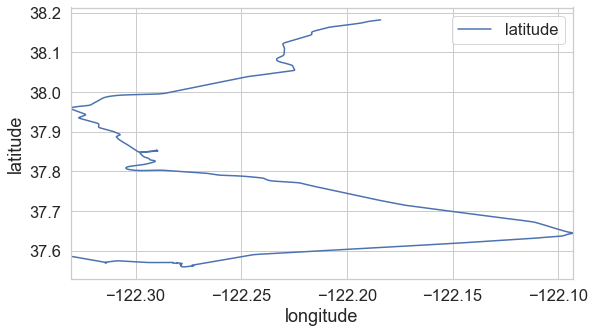

In [4]:
fig, ax = plt.subplots(figsize=(9,5))
df.plot(x='longitude', y='latitude',ax=ax)
plt.ylabel('latitude');

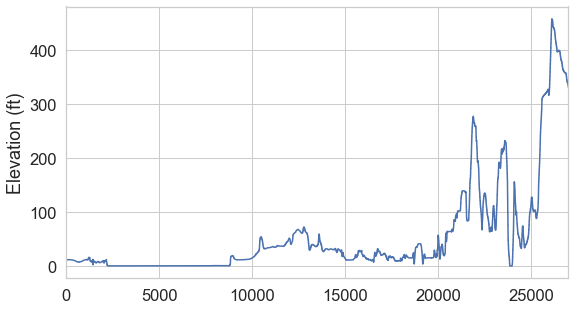

In [5]:
fig, ax = plt.subplots(figsize=(9,5))
df.elev_ft.plot(ax=ax)
plt.ylabel('Elevation (ft)');


__Note__ the bridge events where elevation hits 0 feet (USGS elevation representing sea-level) around 2500-8000 and 24000.

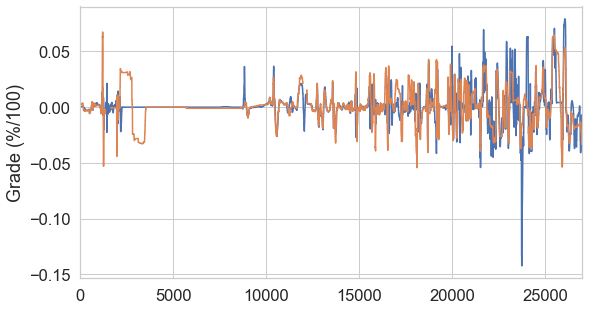

In [6]:
fig, ax = plt.subplots(figsize=(9,5))
df.grade.plot(ax=ax)
(df.tt_grade/1000).plot(ax=ax)
plt.ylabel('Grade (%/100)');